Import MDAnalysis Module (https://www.mdanalysis.org/) and Matplotlib <br/> 
Don't forget to add the permissions: <br/>
sudo jupyter-nbextension enable nglview --py --sys-prefix <br/>
sudo  jupyter-nbextension enable --py widgetsnbextension <br/>

In [1]:
%matplotlib nbagg
%matplotlib inline
import MDAnalysis as mda
import MDAnalysis.analysis.leaflet
import matplotlib
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import nglview as nv

import warnings
warnings.filterwarnings('ignore')

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# no GM1

name = '_DPPC_DIPC_chol_352'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol/'
fgro = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_43nm_352_mb_fixed_t1.xtc'

In [2]:
# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 5% GM1

name = '_DPPC_DIPC_chol_352_5GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_5/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_5_43nm_10ms_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 10% GM1

name = '_DPPC_DIPC_chol_352_10GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_10/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_10_43nm_10ms_mb_fixed_t1.xtc'

# indicate the name of the simulation, the path of the data and the .gro and .xtc files to import
# 20% GM1

name = '_DPPC_DIPC_chol_352_20GM1'

path = '/home/julie/analysis/bilayers/3-5-2/DPPC_DIPC_chol_GM1_20/'

fgro = 'run_DPPC_DIPC_CHOL_GM1_20_43nm_10ms_mb_fixed_t1_ref9999ns.gro'
fxtc = 'run_DPPC_DIPC_CHOL_GM1_20_43nm_10ms_mb_fixed_t1.xtc'

Load xtc and gro files using mda.Universe('struct file','traj file')

In [3]:
u = mda.Universe( path+fgro, path+fxtc)

In [4]:
sel_all = u.select_atoms("all")

In [5]:
# visualize the bilayer and choose the frame to study

v= nv.show_mdanalysis(sel_all)
v.add_spacefill(sel_all, scale=2.0)
v

A Jupyter Widget

In [6]:
# select the different species

xmin=0
ymin=0
str_sel= "(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and (name PO4 or name GM1)"
patch = u.select_atoms(str_sel).positions
print(patch)

Lo = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DPPC").positions
Ld = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name PO4 and resname DIPC").positions
GM1 = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name GM1").positions
chol = u.select_atoms("(prop x> "+str(xmin)+" and prop y> "+str(ymin)+") and name ROH").positions


xmax = max(patch[:,0])
ymax = max(patch[:,1])
#dmax = int(min(xmax,ymax))
print(xmax)
print(ymax)

xmin = min(patch[:,0])
ymin = min(patch[:,1])

print(xmin)
print(ymin)

[[ 26.070002 393.04      73.04    ]
 [ 23.79     278.43      94.23    ]
 [ 44.32     197.87001   87.1     ]
 ...
 [132.79001  216.87      56.43    ]
 [258.23     323.2       32.4     ]
 [176.84     264.72003   54.480003]]
431.35004
431.34003
0.13
0.080000006


In [7]:
# divide the bilayer into 2 leaflets selecting the species you want

Lf = mda.analysis.leaflet.LeafletFinder(u, 'name PO4 or name GM1') # 
leaflet0 = Lf.groups(0)
leaflet1 = Lf.groups(1)

In [8]:
# set the number of boxes into which will be divided the membrane

N = 15
dx = (xmax-xmin)/N
dy = (ymax-ymin)/N

(225, 3)
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.05555556
  0.         0.         0.         0.         0.07142857 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.45454545
  0.46153846 0.18181818 0.         0.         0.07692308 0.
  0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.45454545
  0.45454545 0.75       0.33333333 0.45454545 0.44444444 0.30769231
  0.42857143 0.08333333 0.        ]
 [0.         0.         0.         0.         0.         0.21428571
  0.23076923 0.16666667 0.         0.         0.09090909 0.35294118
  0.75       0.33333333 0.        ]
 [0.         0.         0.         0.         0.         0.1
  0.         0.08333333 0.         0.         0.44444444 0.16666667
  0.14285714 0.28571429 0.09090909

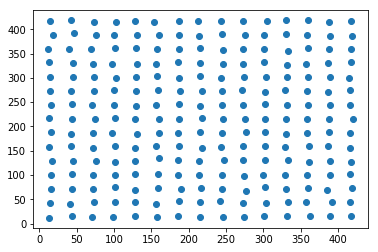

In [9]:
# leaflet 0
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary0 = []
#del Mphi0

Mphi0_Lo = np.zeros((N,N))
Mphi0_Ld = np.zeros((N,N))
Mphi0_GM1 = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        str_sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b0=leaflet0.select_atoms(str_sel).centroid().tolist()
        bary0.append(b0)
        
        # composition rates in each box
        sel_tot= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        tot0= leaflet0.select_atoms(sel_tot).positions
        n_tot0=len(tot0) # total number of molecules
        
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot0PC= leaflet0.select_atoms(sel_totPC).positions
        n_tot0PC=len(tot0PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo0= leaflet0.select_atoms(sel_Lo).positions
        n_Lo0=len(Lo0) # number of molecules of the Lo phase (DPPC here)
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DIPC"
        Ld0= leaflet0.select_atoms(sel_Ld).positions
        n_Ld0=len(Ld0) # number of molecules of the Ld phase (DIPC here)
        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_0= leaflet0.select_atoms(sel_GM1).positions
        n_GM1_0=len(GM1_0) # number of GM1 molecules
        
        
        phi0_Lo=n_Lo0/n_tot0PC
        phi0_Ld=n_Ld0/n_tot0PC
        phi0_GM1=n_GM1_0/n_tot0
        
        Mphi0_Lo[i,j]=phi0_Lo
        Mphi0_Ld[i,j]=phi0_Ld
        Mphi0_GM1[i,j]=phi0_GM1
        
        
bary0=np.array(bary0)

plt.scatter(bary0[:,0],bary0[:,1])

print(np.shape(bary0))
print(Mphi0_GM1)

(225, 3)
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


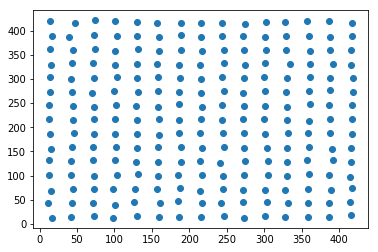

In [10]:
# leaflet 1
# divide the leaflet into a grid and calculate the concentration ratio in each box

bary1 = []
#del Mphi1
Mphi1_Lo = np.zeros((N,N))
Mphi1_Ld = np.zeros((N,N))
Mphi1_GM1 = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # barycenter of all molecules in each box
        str_sel= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+")"
        b1=leaflet1.select_atoms(str_sel).centroid().tolist()
        bary1.append(b1)
        
        # composition rates in each box
        sel_tot= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot1= leaflet1.select_atoms(sel_tot).positions
        n_tot1=len(tot1) # total number of molecules
        
        sel_totPC= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+" and name PO4)"
        tot1PC= leaflet1.select_atoms(sel_totPC).positions
        n_tot1PC=len(tot1PC) # total number of PC
        
        sel_Lo= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DPPC"
        Lo1= leaflet1.select_atoms(sel_Lo).positions
        n_Lo1=len(Lo1) # number of molecules of the Lo phase (DPPC here)
        
        sel_Ld= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and resname DIPC"
        Ld1= leaflet1.select_atoms(sel_Ld).positions
        n_Ld1=len(Ld1) # number of molecules of the Ld phase (DIPC here)
        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_1= leaflet1.select_atoms(sel_GM1).positions
        n_GM1_1=len(GM1_1) # number of GM1 molecules
        
        
        phi1_Lo=n_Lo1/n_tot1PC
        phi1_Ld=n_Ld1/n_tot1PC
        phi1_GM1=n_GM1_1/n_tot1
        
        Mphi1_Lo[i,j]=phi1_Lo
        Mphi1_Ld[i,j]=phi1_Ld
        Mphi1_GM1[i,j]=phi1_GM1
        
        
bary1=np.array(bary1)

plt.scatter(bary1[:,0],bary1[:,1])

print(np.shape(bary1))
print(Mphi1_GM1)

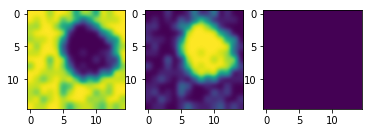

In [11]:
# leaflet 1

f, (ax1,ax2, ax3) = plt.subplots(1,3)
ax1.imshow(Mphi1_Ld, interpolation='gaussian')
ax2.imshow(Mphi1_Lo, interpolation='gaussian')
ax3.imshow(Mphi1_GM1, interpolation='gaussian')

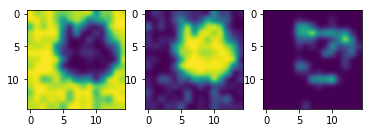

In [12]:
# leaflet 0

f, (ax1,ax2, ax3) = plt.subplots(1,3)
ax1.imshow(Mphi0_Ld, interpolation='gaussian')
ax2.imshow(Mphi0_Lo, interpolation='gaussian')
ax3.imshow(Mphi0_GM1, interpolation='gaussian')

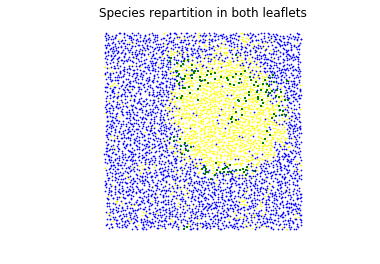

In [13]:
# plot the repartition of the different species

plt.scatter(Lo[:,1]/N, -Lo[:,0]/N, marker='.', c='yellow', s=2)
plt.scatter(Ld[:,1]/N, -Ld[:,0]/N, marker='.', c='b', s=2)
plt.scatter(GM1[:,1]/N, -GM1[:,0]/N, marker='+', c='g', s=4)
#plt.scatter(tot0[:,1]/N, -tot0[:,0]/N, marker='v', c='orange', s=2)
#plt.scatter(Ld0[:,1]/N, -Ld0[:,0]/N, marker='+', c='pink', s=2)
#plt.scatter(chol[:,1]/N, -chol[:,0]/N, marker='.', c='gray', s=2)

plt.axis('equal')
plt.axis('off')
plt.title('Species repartition in both leaflets',fontsize=12)
plt.savefig(path+'species'+name+'.pdf', format='pdf',bbox_inches='tight')

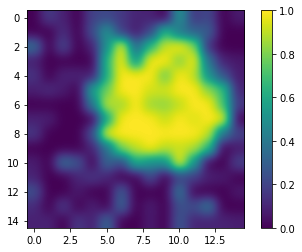

In [14]:
# DPPC / (DPPC+DIPC) leaflet 0
plt.imshow(Mphi0_Lo, interpolation='gaussian')
plt.colorbar()
plt.savefig(path+'compo-upperleaflet'+name+'.pdf', format='pdf',bbox_inches='tight')

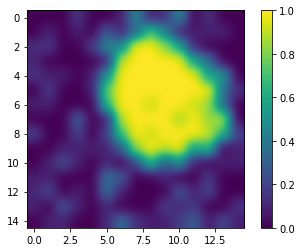

In [15]:
# DPPC / (DPPC+DIPC) leaflet 1
plt.imshow(Mphi1_Lo, interpolation='gaussian')
plt.colorbar()
plt.savefig(path+'compo-lowerleaflet'+name+'.pdf', format='pdf',bbox_inches='tight')

In [16]:
# Choose the leaflet of interest

Mphi_Ld = Mphi0_Ld
Mphi_Lo = Mphi0_Lo
Mphi_GM1 = Mphi0_GM1

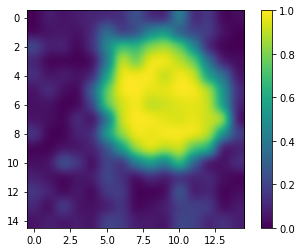

In [17]:
# a voir
Mphi_mean = (Mphi0_Lo+Mphi1_Lo)/2
plt.imshow(Mphi_mean, interpolation='gaussian')
plt.colorbar()

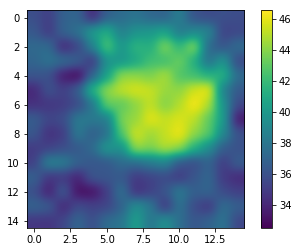

In [18]:
# compute the local thickness = the difference of z between the boxes of the 2 leaflets

bary0.shape=(N,N,3)
bary1.shape=(N,N,3)

diffz=bary0[:,:,2]-bary1[:,:,2]

bary0.shape=(N*N,3)
bary1.shape=(N*N,3)

plt.imshow(diffz, interpolation='gaussian')
plt.colorbar()
#plt.title('Epaisseur de la bicouche',fontsize=12)
plt.savefig(path+'thickness'+name+'.pdf', format='pdf',bbox_inches='tight')

In [19]:
mean_thickness = np.mean(diffz)
max_thickness = np.max(diffz)
min_thickness = np.min(diffz)
print('Mean thickness: %f\n Max thickness: %f\n Min thickness: %f\n' % (mean_thickness, max_thickness, min_thickness))

Mean thickness: 38.441880
 Max thickness: 46.558002
 Min thickness: 32.495499



(-1.5569660062093214,
 30.318301766098642,
 -30.250852600085103,
 1.4851302061554223)

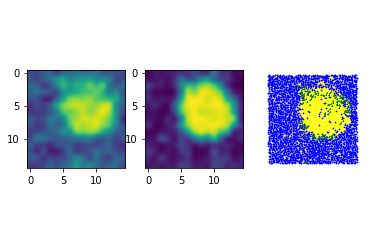

In [20]:
f, (ax1,ax2, ax3) = plt.subplots(1,3)
ax1.imshow(diffz, interpolation='gaussian')
ax2.imshow(Mphi_mean, interpolation='gaussian')

ax3.scatter(Lo[:,1]/N, -Lo[:,0]/N, marker='.', c='yellow', s=2)
ax3.scatter(Ld[:,1]/N, -Ld[:,0]/N, marker='.', c='b', s=2)
ax3.scatter(GM1[:,1]/N, -GM1[:,0]/N, marker='+', c='g', s=1)
ax3.axis('equal')
ax3.axis('off')


In [21]:
# create the needed variable to calculate the local curvature

bary=(bary0+bary1)/2 # median leaflet
print(bary0[0,1])
print(bary1[0,1])
print(bary[0,1])

neigh = [0,0,0,0,0]
h=bary[:,2]

11.841817855834961
12.485000610351562
12.163409233093262


In [22]:
# define the function that gives the neighboring

def F_neigh(n) :
    neigh[0] = n
    i=n%N
    j=int(n/N)
    ip1=(i+1)%N
    im1=(i-1)%N
    jp1=(j+1)%N
    jm1=(j-1)%N
    neigh[1] = ip1+N*j
    neigh[2] = im1+N*j
    neigh[3] = i+N*jm1
    neigh[4] = i+N*jp1

In [23]:
# define the function that computes the discrete Laplacian in 2D (with 4 cross neighbors)

def Lap(n) :
    lap = ( h[neigh[4]]+h[neigh[3]]-2*h[neigh[0]] ) / dx**2 + ( h[neigh[1]]+h[neigh[2]]-2*h[neigh[0]] ) / dy**2
    return(lap)

In [24]:
# compute the local curvature in each box of the grid

laplacian = []
for i in range(N*N) :
    F_neigh(i)
    laplacian.append(Lap(i))
    
#print(laplacian)    

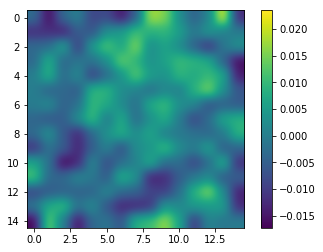

In [25]:
# create a matrix that contains x, y and the local curvature for each box and scatter it

import copy
curv = copy.copy(bary) # then we get x, y and the 3rd column
curv[:,2] = laplacian # then the 3rd column is filled in with the curvature
C = curv[:,2]
C.shape=(N,N) # we create a matrix C that contains the curvature in function of x and y

plt.imshow(-C, interpolation='gaussian')
plt.colorbar()
#plt.title('Local curvature (medial leaflet)',fontsize=12)
plt.savefig(path+'local_curvature'+name+'.pdf', format='pdf',bbox_inches='tight')

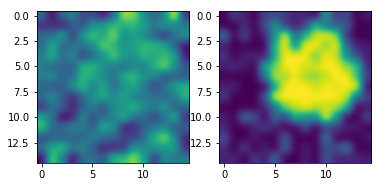

In [26]:
f, (ax1, ax2) = plt.subplots(1,2)
ax1.imshow(-C, interpolation='gaussian')
ax2.imshow(Mphi0_Lo, interpolation='gaussian')

In [27]:
# correlation up-down leaflet composition
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( Mphi0_Lo[i,j]*Mphi1_Lo[i,j] - np.mean(Mphi0_Lo)*np.mean(Mphi1_Lo) ) / np.std(Mphi0_Lo)/np.std(Mphi1_Lo)
cov_phi = sum/N**2
print(cov_phi)     

0.8668662309233833


In [28]:
# correlation composition - local thickness
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( Mphi_mean[i,j]*diffz[i,j] - np.mean(Mphi_mean)*np.mean(diffz) ) / np.std(Mphi_mean)/np.std(diffz)
cov_e = sum/N**2
print(cov_e)     

0.8878940423887727


In [29]:
# correlation composition - local curvature
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( C[i,j]*Mphi0_Lo[i,j] - np.mean(C)*np.mean(Mphi0_Lo) ) / np.std(C)/np.std(Mphi0_Lo)
cov_c = sum/N**2
print(cov_c)  

-0.2760381493716655


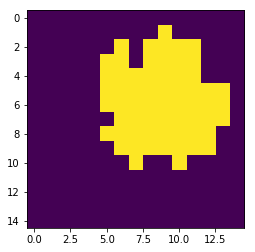

In [58]:
# upper leaflet binary composition

threshold = 0.6 # composition threshold from which the box is considered Lo, below it is considered Ld

Mphi0_bin = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        if Mphi0_Lo[i,j]>= threshold :
            Mphi0_bin[i,j]=1


#print(Mphi0_bin)          

plt.imshow(Mphi0_bin)

plt.savefig(path+'binary-compo_lower-upper_leaflet'+name+'.pdf', format='pdf',bbox_inches='tight')

In [43]:
# area ratio Lo / tot

area_ratio = np.sum(Mphi0_bin)/(N*N)
print(area_ratio)

0.27555555555555555


In [44]:
# Fraction of GM1 molecules located in the Lo phase

M_nb_GM1 = np.zeros((N,N))

for i in range(0,N):
    xs = xmin + i*dx
    for j in range(0,N):
        ys = ymin + j*dy
        
        # GM1 rates in each box        
        sel_GM1= "(prop x>= "+str(xs)+" and prop x< "+str(xs+dx)+" and prop y>= "+str(ys)+" and prop y< "+str(ys+dy)+") and name GM1"
        GM1_0= leaflet0.select_atoms(sel_GM1).positions
        n_GM1_0=len(GM1_0) # number of GM1 molecules        

        M_nb_GM1[i,j]=n_GM1_0
        
#print(M_nb_GM1)  
nb_GM1_tot = np.sum(M_nb_GM1)
print(nb_GM1_tot)

150.0


In [45]:
# rate of GM1 that are located in the Lo phase

M_GM1_Lo = Mphi0_bin*M_nb_GM1
#print(M_GM1_Lo)
nb_GM1_Lo = np.sum(M_GM1_Lo)
print(nb_GM1_Lo)
rate_GM1_Lo = nb_GM1_Lo/nb_GM1_tot
print(rate_GM1_Lo)

101.0
0.6733333333333333


In [46]:
# Lo boundary detection

Mphi0_bin.shape=(N*N)
M_bound_Lo = np.zeros((N*N))
neigh = [0,0,0,0,0]
for i in range(N*N) :
    F_neigh(i)
    if Mphi0_bin[i]==1 and (Mphi0_bin[i]!=Mphi0_bin[neigh[1]] or Mphi0_bin[i]!=Mphi0_bin[neigh[2]] or Mphi0_bin[i]!=Mphi0_bin[neigh[3]] or Mphi0_bin[i]!=Mphi0_bin[neigh[4]]):
        M_bound_Lo[i]=1
M_bound_Lo.shape=(N,N)
Mphi0_bin.shape=(N,N)
#print(M_bound_Lo)

In [47]:
# Ld boundary detection

Mphi0_bin.shape=(N*N)
M_bound_Ld = np.zeros((N*N))
neigh = [0,0,0,0,0]
for i in range(N*N) :
    F_neigh(i)
    if Mphi0_bin[i]==0 and (Mphi0_bin[i]!=Mphi0_bin[neigh[1]] or Mphi0_bin[i]!=Mphi0_bin[neigh[2]] or Mphi0_bin[i]!=Mphi0_bin[neigh[3]] or Mphi0_bin[i]!=Mphi0_bin[neigh[4]]):
        M_bound_Ld[i]=1
M_bound_Ld.shape=(N,N)
Mphi0_bin.shape=(N,N)
#print(M_bound_Ld)

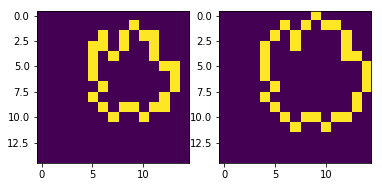

In [48]:
f, (ax1,ax2) = plt.subplots(1,2)
ax1.imshow(M_bound_Lo)
ax2.imshow(M_bound_Ld)

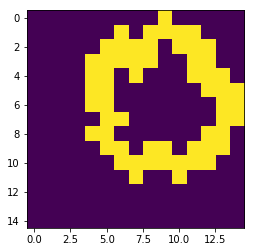

In [49]:
M_bound=M_bound_Lo+M_bound_Ld
plt.imshow(M_bound)

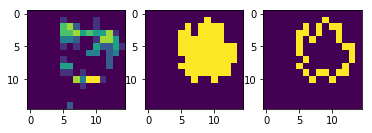

In [50]:
f, (ax1,ax2,ax3) = plt.subplots(1,3)
ax1.imshow(M_nb_GM1)
ax2.imshow(Mphi0_bin)
ax3.imshow(M_bound_Lo)
plt.savefig(path+'GM1locations_Lo_boundary'+name+'.pdf', format='pdf',bbox_inches='tight')

In [51]:
# Fraction of GM1 molecules located at the Lo boundary

M_GM1_bound_Lo = M_bound_Lo*M_nb_GM1
#print(M_GM1_bound_Lo)
nb_GM1_bound_Lo = np.sum(M_GM1_bound_Lo)
print(nb_GM1_bound_Lo)
rate_GM1_bound_Lo = nb_GM1_bound_Lo/nb_GM1_tot
print(rate_GM1_bound_Lo)

67.0
0.44666666666666666


In [63]:
M_GM1_Ld = (1-Mphi0_bin)*M_nb_GM1
nb_GM1_Ld = np.sum(M_GM1_Ld)
print(nb_GM1_Ld)
rate_GM1_Ld = nb_GM1_Ld/nb_GM1_tot
print(rate_GM1_Ld)

49.0
0.32666666666666666


In [52]:
# write these results to a file

file = open(path+'correl_coloc'+name+'.txt','w') 
file.write('correlation leaflet up-down: %lf\ncorrelation compo-thickness: %lf\ncorrelation compo-curvature: %lf\nFraction of GM1 molecules located in the Lo phase: %lf\nFraction of GM1 molecules located at the Lo boundary: %lf\nFraction of GM1 molecules located in the Lo phase / area ratio: %lf\nFraction of GM1 molecules located at the Lo boundary / area ratio: %lf' % (cov_phi, cov_e, cov_c, rate_GM1_Lo, rate_GM1_bound_Lo, rate_GM1_Lo/area_ratio, rate_GM1_bound_Lo/area_ratio)) 
file.close() 

In [54]:
# correlation GM1 in Lo phase - local curvature
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( C[i,j]*M_GM1_Lo[i,j] - np.mean(C)*np.mean(M_GM1_Lo) ) / np.std(C)/np.std(M_GM1_Lo)
cov_c_GM1_Lo = sum/N**2
print(cov_c_GM1_Lo)  

-0.18695024989773218


In [55]:
# correlation GM1 at the Lo phase boundary - local curvature
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( C[i,j]*M_GM1_bound_Lo[i,j] - np.mean(C)*np.mean(M_GM1_bound_Lo) ) / np.std(C)/np.std(M_GM1_bound_Lo)
cov_c_GM1_bound_Lo = sum/N**2
print(cov_c_GM1_bound_Lo)  

-0.13043283106066886


In [64]:
# correlation GM1 in Ld phase - local curvature
# compute the covariance

sum = 0
for i in range(0,N):
    for j in range(0,N):
        sum = sum + ( C[i,j]*M_GM1_Ld[i,j] - np.mean(C)*np.mean(M_GM1_Ld) ) / np.std(C)/np.std(M_GM1_Ld)
cov_c_GM1_Ld = sum/N**2
print(cov_c_GM1_Ld)  

-0.1480327220578653
